#DATA EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('required_dataset.csv')

#understanding the dataset

In [10]:
df.sample(5)

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,earliest_cr_line,fico_range_low,pub_rec,revol_bal,revol_util,recoveries,application_type,bc_util
128274,145729,17000.0,36 months,13.33,575.51,C,C3,< 1 year,RENT,52500.0,...,19.47,0.0,Jun-1982,710.0,0.0,17383.0,64.4,0.0,Individual,75.6
54690,62238,14400.0,36 months,12.59,482.36,C,C2,10+ years,RENT,51000.0,...,20.82,0.0,May-1994,665.0,0.0,11244.0,73.5,0.0,Individual,85.6
131252,149104,18000.0,36 months,7.89,563.15,A,A5,7 years,RENT,96000.0,...,15.13,0.0,Jan-2004,720.0,0.0,9207.0,49.8,0.0,Individual,41.4
115130,130798,8050.0,36 months,9.17,256.63,B,B2,10+ years,RENT,52000.0,...,10.95,0.0,Mar-1996,660.0,1.0,3582.0,12.5,0.0,Individual,8.4
166284,188961,14000.0,60 months,17.86,354.45,D,D5,5 years,OWN,44500.0,...,22.28,0.0,May-2002,720.0,0.0,14747.0,70.2,1236.9,Individual,19.4


In [11]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
df.shape

(269029, 23)

In [13]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'pub_rec', 'revol_bal',
       'revol_util', 'recoveries', 'application_type', 'bc_util'],
      dtype='object')

data types

In [17]:
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_length,object
home_ownership,object
annual_inc,float64
verification_status,object


In [18]:
df.duplicated().sum()

np.int64(0)

null values

In [19]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,16042
home_ownership,0
annual_inc,0
verification_status,0


missing value percentage

In [20]:
missing_values_cols=[col for col in df.columns if df[col].isnull().any()]
missing_values_cols

['emp_length', 'dti', 'revol_util', 'bc_util']

In [21]:
for i in missing_values_cols:
  print(i,df[i].isnull().sum()/df.shape[0]*100)

emp_length 5.962925929918336
dti 0.0007434142787580521
revol_util 0.04125949247107189
bc_util 1.012901954807846


missing value percentage is near 5% ,so it is good to go

#Target Variable Analysis

In [22]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,214873
Charged Off,54156


In [24]:
df['loan_status'].value_counts(normalize=True)*100

,proportion
loan_status,
Fully Paid,79.869828
Charged Off,20.130172


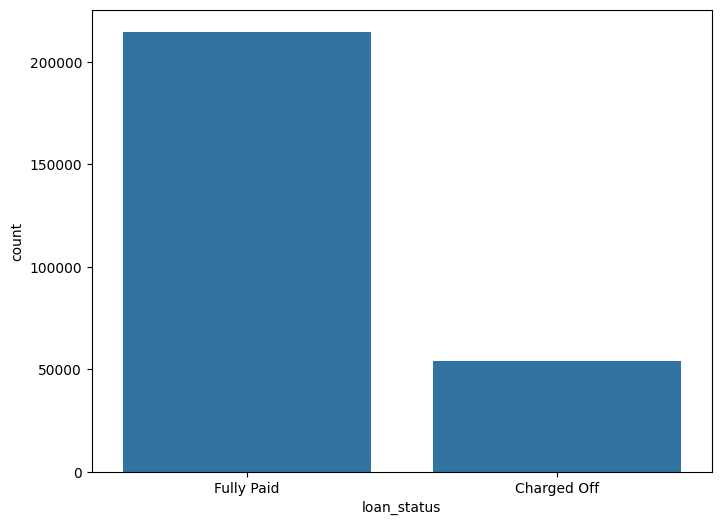

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status',data=df)
plt.show()

#Numerical Feature Exploration

In [27]:
num_cols=["loan_amnt",
"int_rate",
"installment",
"annual_inc",
"dti",
"fico_range_low",
"revol_bal",
"revol_util",
"bc_util"
]

In [31]:
df[num_cols].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,revol_bal,revol_util,bc_util
count,269029.000000,269029.000000,269029.000000,2.690290e+05,269027.000000,269029.000000,2.690290e+05,268918.000000,266304.000000
mean,14580.076033,12.263937,436.276346,7.677529e+04,18.939255,694.078817,1.714907e+04,52.415391,60.836959
std,8562.585971,4.305573,253.031712,7.926974e+04,8.999962,30.752103,2.440111e+04,23.966299,27.871474
min,1000.000000,5.320000,14.770000,0.000000e+00,0.000000,660.000000,0.000000e+00,0.000000,0.000000
25%,8000.000000,9.170000,251.560000,4.542700e+04,12.365000,670.000000,6.148000e+03,34.500000,39.600000
50%,12300.000000,12.050000,375.430000,6.500000e+04,18.370000,685.000000,1.140400e+04,52.500000,63.900000
75%,20000.000000,14.650000,578.210000,9.100000e+04,25.110000,710.000000,2.047900e+04,70.600000,85.400000
max,35000.000000,28.990000,1445.460000,9.500000e+06,999.000000,845.000000,2.904836e+06,193.000000,235.300000


1.annual_income,dti,revol_bal,revol_util,bc_util,int_rate,maybe installment are possible for outliers

Distribution Plots

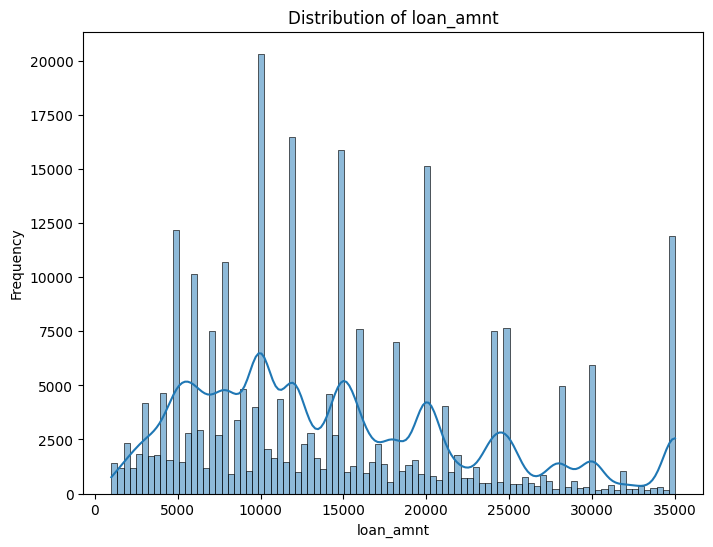

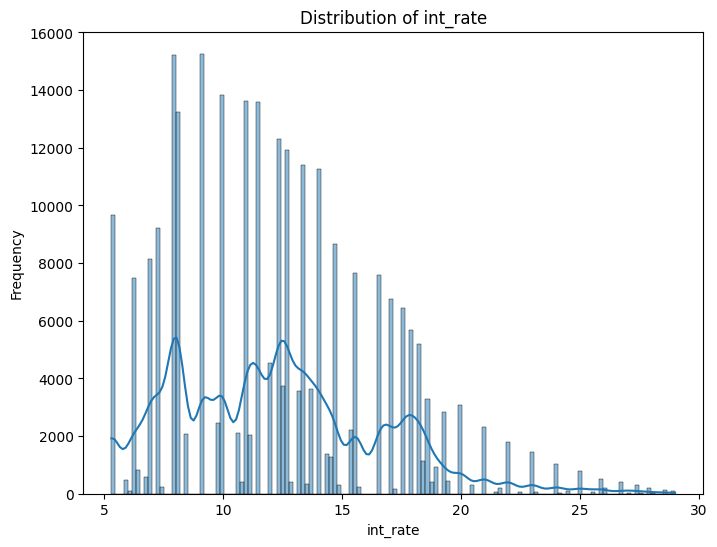

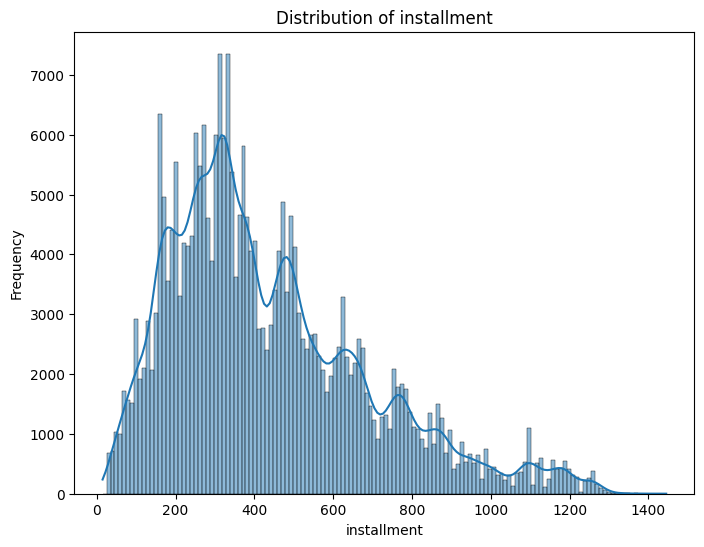

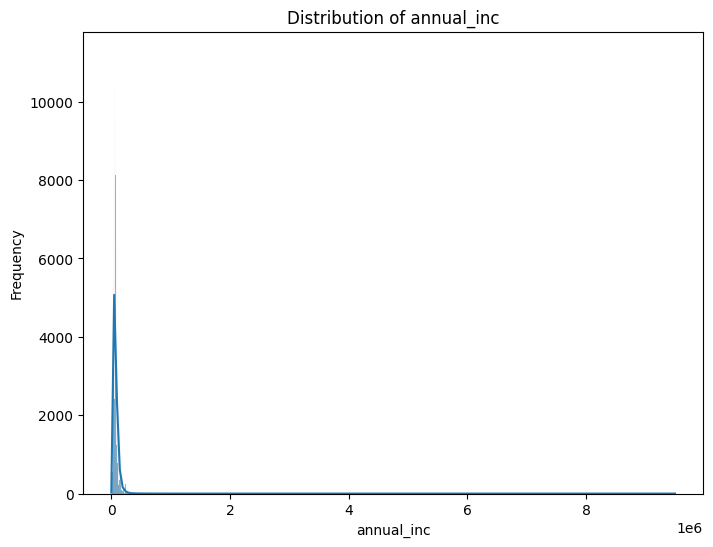

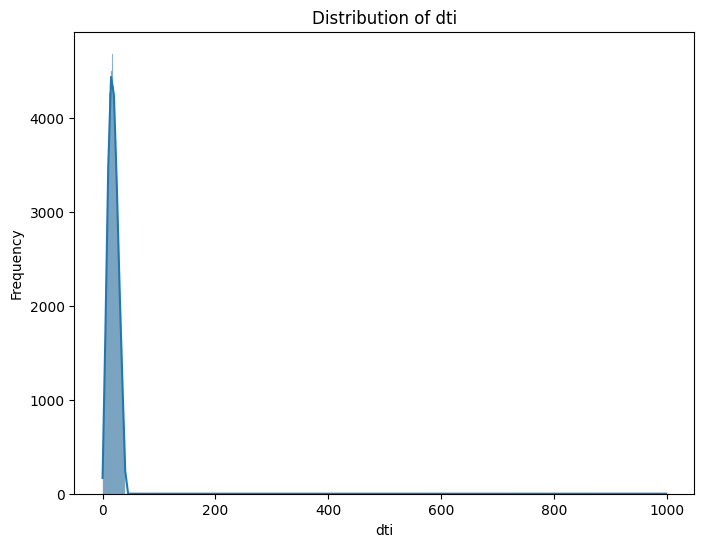

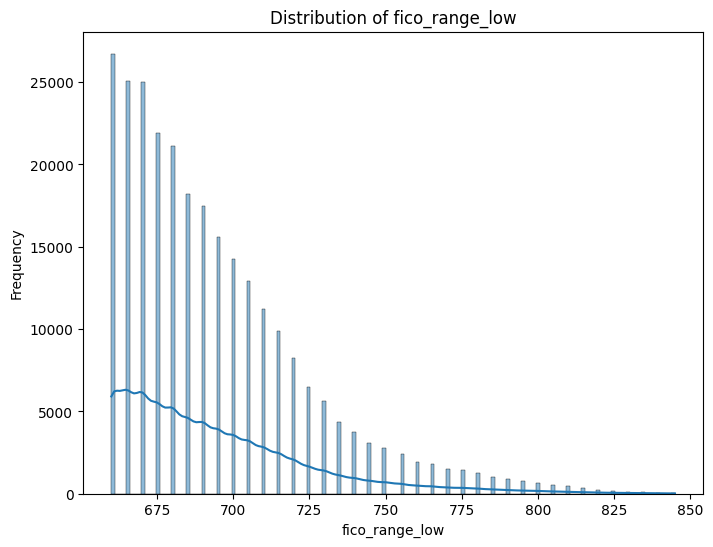

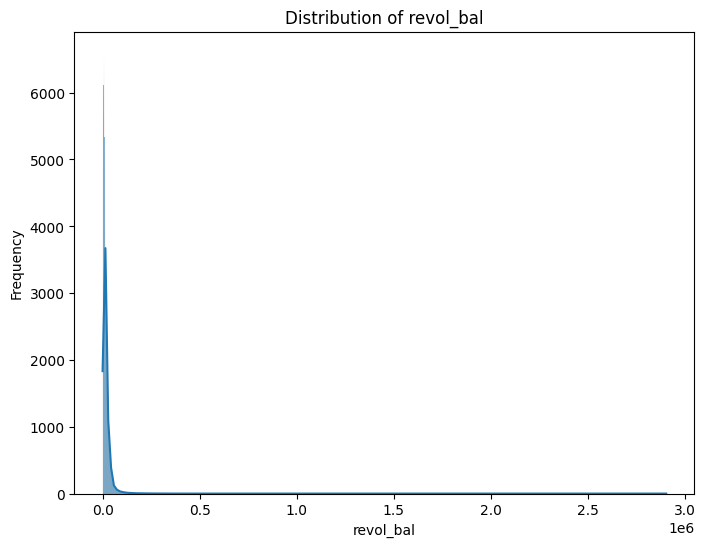

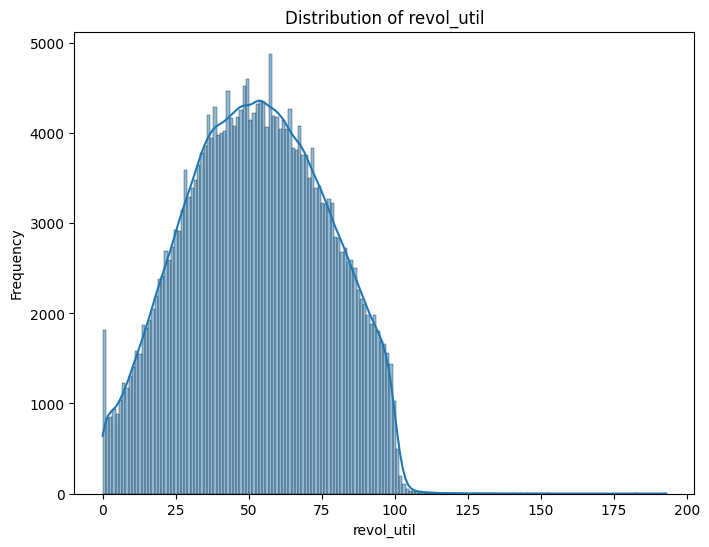

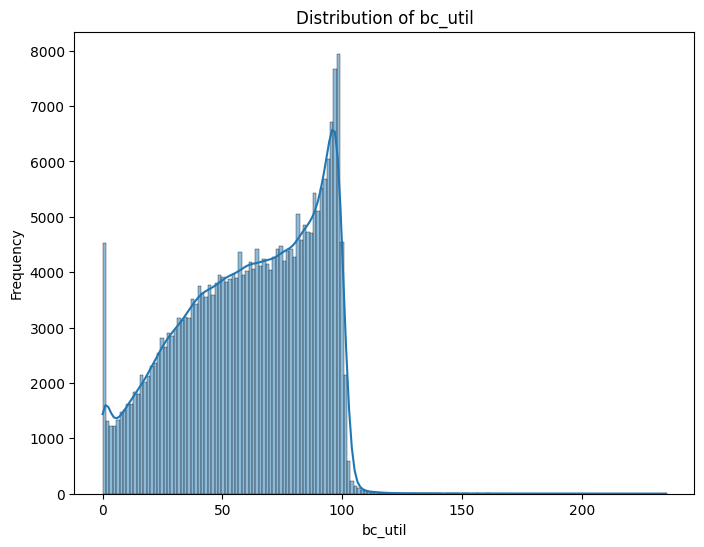

In [36]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Box Plots

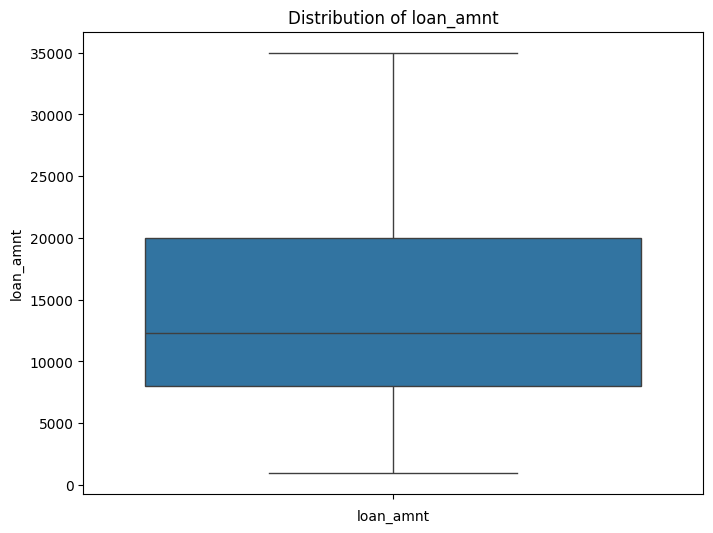

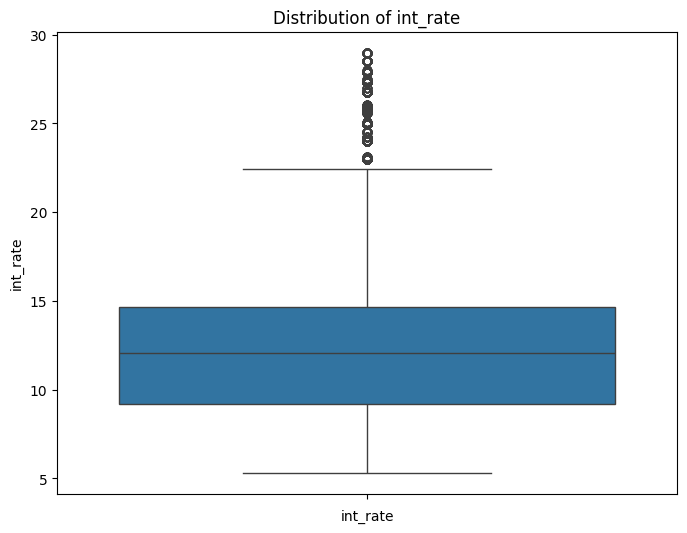

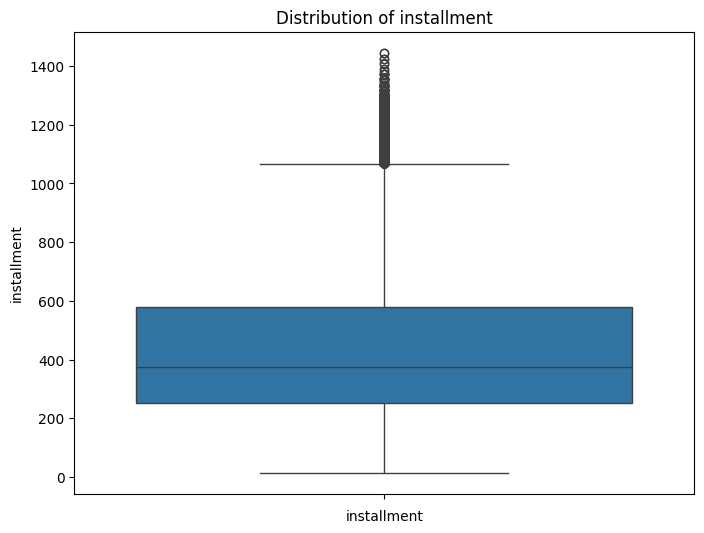

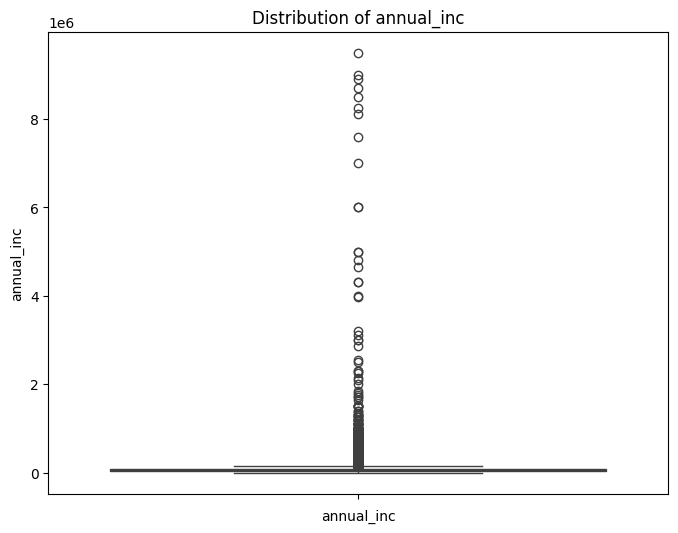

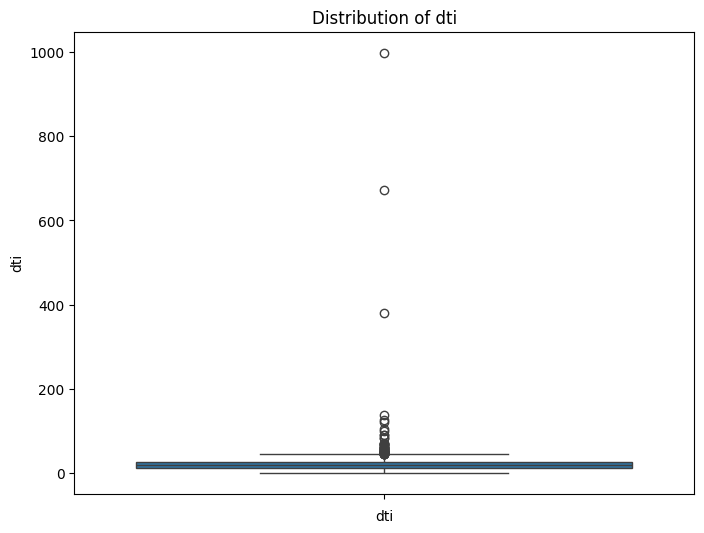

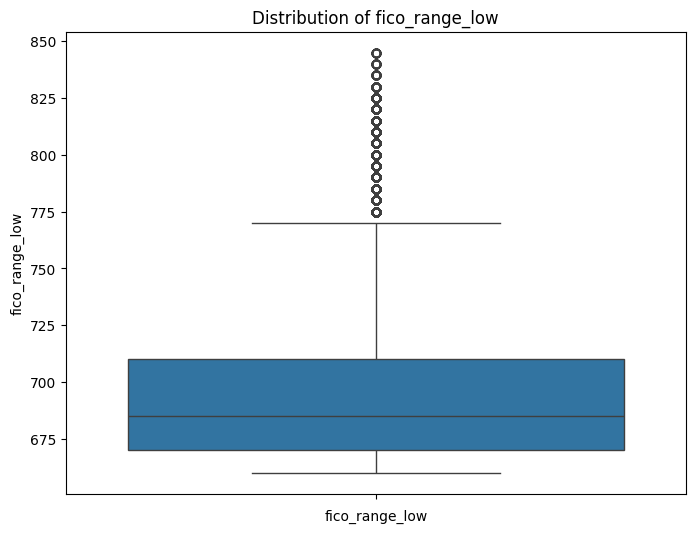

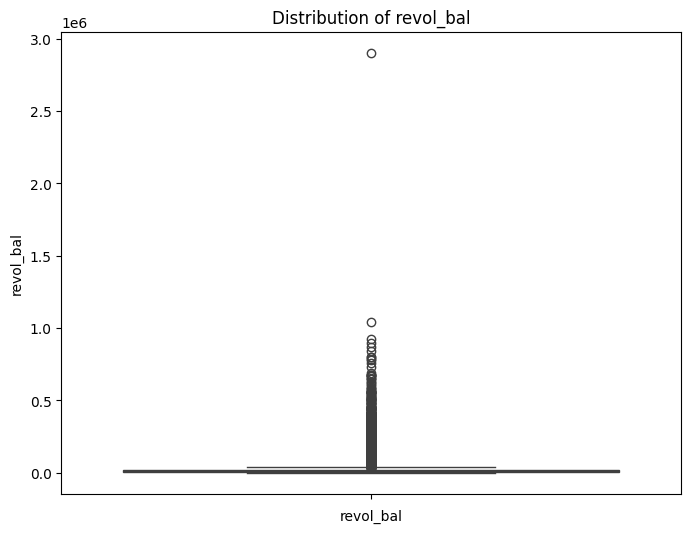

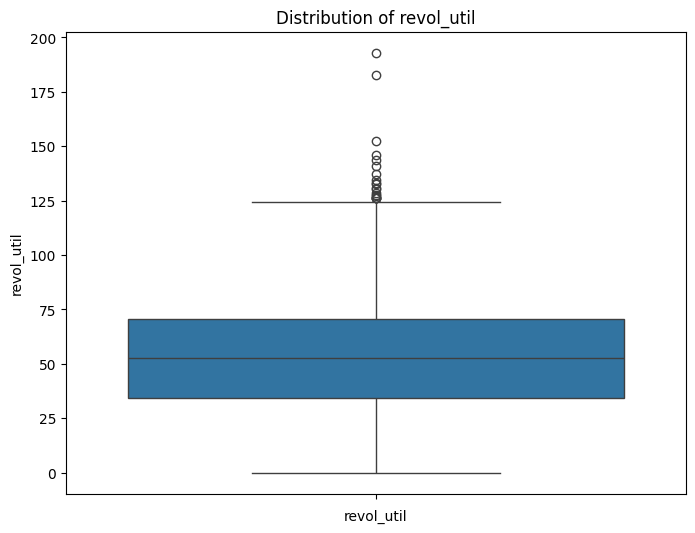

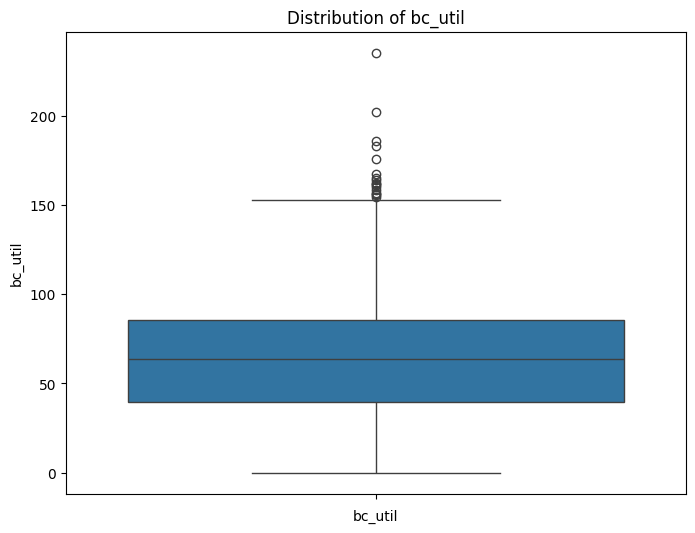

In [38]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col].dropna())
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [39]:
avg_int_rate = df.groupby('loan_status')['int_rate'].mean()
print("Average Interest Rate by Loan Status:")
print(avg_int_rate)

Average Interest Rate by Loan Status:
loan_status
Charged Off    14.883402
Fully Paid     11.603734
Name: int_rate, dtype: float64


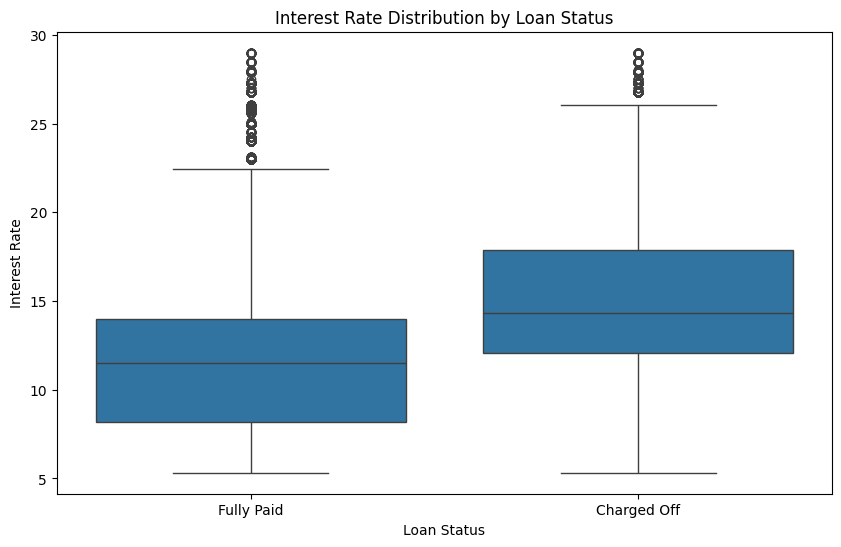

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

In [41]:
avg_dti = df.groupby('loan_status')['dti'].mean()
print("Average DTI by Loan Status:")
print(avg_dti)

Average DTI by Loan Status:
loan_status
Charged Off    21.001306
Fully Paid     18.419548
Name: dti, dtype: float64


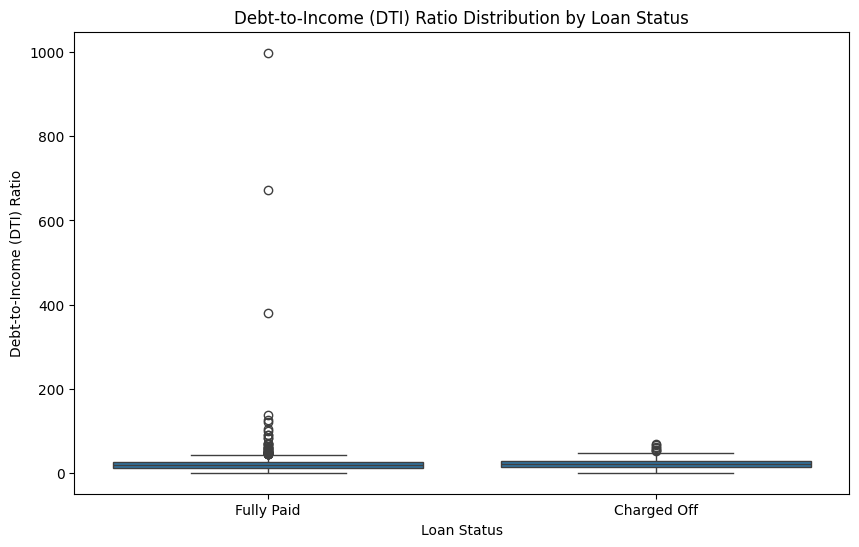

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('Debt-to-Income (DTI) Ratio Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income (DTI) Ratio')
plt.show()

## Summary:

### Q&A
1.  **What is the average interest rate for 'Fully Paid' vs. 'Charged Off' loans?**
    *   The average interest rate for 'Charged Off' loans is approximately 14.88%.
    *   The average interest rate for 'Fully Paid' loans is approximately 11.60%.
2.  **What is the average Debt-to-Income (DTI) ratio for 'Fully Paid' vs. 'Charged Off' loans?**
    *   The average DTI ratio for 'Charged Off' loans is approximately 21.00.
    *   The average DTI ratio for 'Fully Paid' loans is approximately 18.42.

### Data Analysis Key Findings
*   Loans that are 'Charged Off' have a significantly higher average interest rate (approximately 14.88%) compared to 'Fully Paid' loans (approximately 11.60%), indicating a 3.28 percentage point difference.
*   The Debt-to-Income (DTI) ratio is also notably higher for 'Charged Off' loans (approximately 21.00) than for 'Fully Paid' loans (approximately 18.42), suggesting a 2.58 point difference.
*   Box plots confirmed these differences in both central tendency and distribution spread for interest rates and DTI ratios between the two loan statuses.

### Insights or Next Steps
*   Higher interest rates and DTI ratios appear to be strong indicators of increased loan default risk. Lenders could use these metrics to assess borrower creditworthiness more accurately.
*   Further analysis should include the FICO score comparison as initially intended, and explore the correlation between these factors to build a predictive model for loan default.


#Categorical Feature Exploration

In [43]:
cat_cols=["grade",
"sub_grade",
"purpose",
"emp_length",
"home_ownership",
"verification_status",
"application_type",
]

In [45]:
for i in cat_cols:
  print(i,df[i].value_counts())

grade grade
B    78567
C    74643
A    51815
D    36804
E    20088
F     5844
G     1268
Name: count, dtype: int64
sub_grade sub_grade
C1    16831
B3    16263
B4    16125
C2    16051
B5    15608
B1    15301
C3    15277
B2    15270
A5    15227
C4    14878
C5    11606
A4    10386
A1    10129
D1    10091
A2     8298
A3     7775
D2     7588
D3     6907
D4     6587
D5     5631
E1     5301
E2     4794
E3     4099
E4     3315
E5     2579
F1     1968
F2     1443
F3     1029
F4      787
F5      617
G1      439
G2      350
G3      232
G4      140
G5      107
Name: count, dtype: int64
purpose purpose
debt_consolidation    156407
credit_card            65842
home_improvement       16956
other                  13075
major_purchase          5021
medical                 2779
car                     2354
small_business          2127
moving                  1731
vacation                1638
house                    940
renewable_energy         157
wedding                    2
Name: count, dtype: int64


In [48]:
df.groupby('grade')['loan_status'].value_counts()

grade  loan_status
A      Fully Paid     49021
       Charged Off     2794
B      Fully Paid     68405
       Charged Off    10162
C      Fully Paid     57743
       Charged Off    16900
D      Fully Paid     24791
       Charged Off    12013
E      Fully Paid     11533
       Charged Off     8555
F      Charged Off     3031
       Fully Paid      2813
G      Charged Off      701
       Fully Paid       567
Name: count, dtype: int64

In [49]:
df.groupby('verification_status')['loan_status'].value_counts()

verification_status  loan_status
Not Verified         Fully Paid     61968
                     Charged Off    10474
Source Verified      Fully Paid     92800
                     Charged Off    23616
Verified             Fully Paid     60105
                     Charged Off    20066
Name: count, dtype: int64

In [50]:
df.groupby('emp_length')['loan_status'].value_counts()

emp_length  loan_status
1 year      Fully Paid     14298
            Charged Off     3709
10+ years   Fully Paid     71761
            Charged Off    17039
2 years     Fully Paid     19358
            Charged Off     4726
3 years     Fully Paid     17208
            Charged Off     4305
4 years     Fully Paid     12604
            Charged Off     3197
5 years     Fully Paid     12922
            Charged Off     3285
6 years     Fully Paid      8467
            Charged Off     2099
7 years     Fully Paid      8936
            Charged Off     2215
8 years     Fully Paid     10994
            Charged Off     2896
9 years     Fully Paid      8483
            Charged Off     2170
< 1 year    Fully Paid     17765
            Charged Off     4550
Name: count, dtype: int64

#Time-Based Exploration

In [52]:
df["issue_d"].value_counts()

,count
issue_d,
Oct-2015,42986
Jul-2015,41053
Dec-2015,39002
Nov-2015,32908
Aug-2015,31701
May-2015,27477
Jun-2015,25446
Sep-2015,25150
Apr-2015,3306


#Correlation & Redundancy

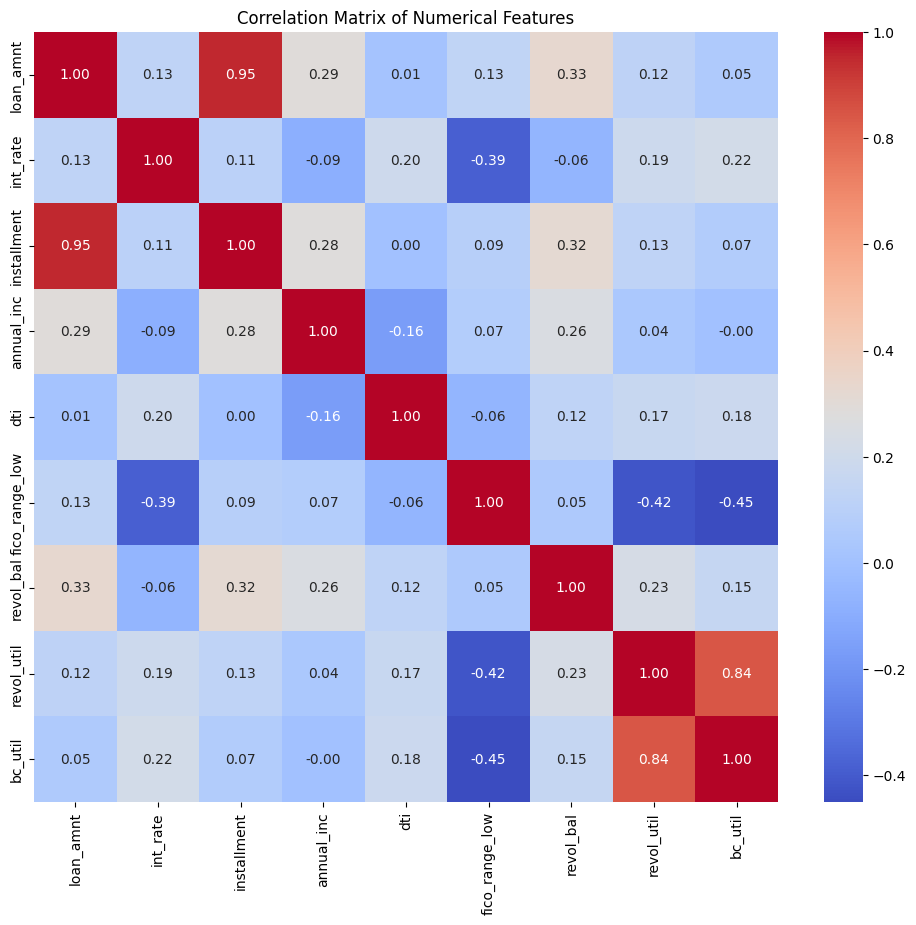

Correlation Matrix:
                loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt        1.000000  0.125755     0.953834    0.289171  0.009284   
int_rate         0.125755  1.000000     0.107223   -0.089459  0.195087   
installment      0.953834  0.107223     1.000000    0.282947  0.000778   
annual_inc       0.289171 -0.089459     0.282947    1.000000 -0.163473   
dti              0.009284  0.195087     0.000778   -0.163473  1.000000   
fico_range_low   0.130362 -0.387500     0.093388    0.071617 -0.061169   
revol_bal        0.329623 -0.063832     0.316999    0.257608  0.122057   
revol_util       0.116554  0.188845     0.125836    0.038901  0.166887   
bc_util          0.054901  0.217916     0.068338   -0.000257  0.179154   

                fico_range_low  revol_bal  revol_util   bc_util  
loan_amnt             0.130362   0.329623    0.116554  0.054901  
int_rate             -0.387500  -0.063832    0.188845  0.217916  
installment           0.093388   0.316999

In [53]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

Loan amnt vs installments +ve



bc_util vs revol util +ve



fifo_range vs int_rate -ve



fifo_range vs revol_util and bc_util -ve


Need to handle the above scenarios

#EDA DELIVERABLES

## EDA Deliverables Summary

### ✔ Which features are strong risk indicators

*   **`int_rate` (Interest Rate)**: Loans that were 'Charged Off' had a significantly higher average interest rate (14.88%) compared to 'Fully Paid' loans (11.60%). This difference is a strong indicator of default risk.
*   **`dti` (Debt-to-Income Ratio)**: 'Charged Off' loans showed a higher average DTI (21.00) than 'Fully Paid' loans (18.42%), making `dti` a strong indicator.
*   **`grade` and `sub_grade`**: The analysis of loan status grouped by grade clearly showed that lower grades (e.g., D, E, F, G) have a higher proportion of 'Charged Off' loans, indicating these are strong categorical risk indicators.
*   **`verification_status`**: While not as strong as grade or interest rate, the value counts grouped by `loan_status` for `verification_status` show some differences, suggesting it could be a moderate indicator.

### ✔ Which features are noisy or useless

*   **`Unnamed: 0`**: This column was dropped early as it Sappeared to be an index artifact from the CSV.
*   **Highly Correlated Numerical Features (potential redundancy/noise):**
    *   **`loan_amnt` and `installment` (Correlation: 0.95):** These are very highly correlated, suggesting one might be redundant in a model. `installment` is often a direct calculation from `loan_amnt`, `int_rate`, and `term`.
    *   **`revol_util` and `bc_util` (Correlation: 0.84):** Both measure credit utilization, and their high correlation suggests redundancy. One could potentially be dropped or combined.
*   **`application_type`**: This feature is highly imbalanced with 'Individual' (268,628) dominating over 'Joint App' (401), which might make it noisy or difficult to use effectively.
*   **`emp_length`**: Has a significant number of missing values (16,042 or ~5.96%), requiring imputation or careful handling.

### ✔ How imbalance affects modeling

The target variable, `loan_status`, is imbalanced:
*   Approximately **79.87% 'Fully Paid'**
*   Approximately **20.13% 'Charged Off'**

This imbalance means a naive model might achieve high accuracy by predicting 'Fully Paid' most of the time but would struggle to identify 'Charged Off' loans. Addressing this will require techniques like oversampling, undersampling, SMOTE, or assigning class weights during model training.

### ✔ Any surprising patterns

*   **`dti` maximum value of 999:** An extremely high and unusual Debt-to-Income ratio, suggesting a data entry error or significant outlier.
*   **`revol_util` and `bc_util` values greater than 100%:** These utilization rates are typically capped at 100%. Values over 100% (e.g., `revol_util` max 193, `bc_util` max 235.3) indicate unique calculation methods, temporary over-limit situations, or data anomalies.
*   **`annual_inc` minimum value of 0:** An annual income of exactly 0 is unusual for a loan applicant, potentially indicating a data entry issue, a category for unemployed individuals, or a placeholder for missing data.